In [1]:
import pandas as pd 
import pathlib 
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
SOURCE_DIR = pathlib.Path("./reports")
bill_status_csv = list(SOURCE_DIR.glob("./pages/*bill_status.csv.gz"))
detailed_bill_status_csv = list(SOURCE_DIR.glob("./bills/*bill_status.csv.gz"))

In [3]:
frames = []
for path in bill_status_csv: 
    df = pd.read_csv(path)
    frames.append(df)
bills_df = pd.concat(frames)

In [4]:
bills_df

,congress,house,bill_number,processed,subjects_present,subjects_processed,summaries_present,summaries_processed,textVersions_present,textVersions_processed,bill_texts_present,bill_texts_processed
0,102,s,3389,True,True,True,True,True,True,True,3,3
1,102,s,3371,True,True,True,True,True,True,True,3,3
2,102,s,3096,True,True,True,True,True,True,True,4,4
3,102,s,2952,True,True,True,True,True,True,True,4,4
4,102,s,2877,True,True,True,True,True,True,True,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
17823,117,sjres,25,True,True,True,True,True,True,False,1,1
17824,117,sres,371,True,True,True,True,True,True,False,1,1
17825,117,sres,370,True,True,True,True,True,True,False,1,1
17826,117,s,2764,True,True,True,True,True,True,False,1,1


In [5]:
bill_counts = bills_df.groupby(["congress", "house"]).agg(
    bill_count=("bill_number", "count"),
    processed_count=("processed", "sum"), 
    present_subjects=("subjects_present", "sum"), 
    processed_subjects=("subjects_processed", "sum"), 
    present_summaries=("summaries_present", "sum"), 
    processed_summaries=("summaries_processed", "sum"), 
    present_text=("textVersions_present", "sum"), 
    processed_text=("textVersions_processed", "sum"), 
    bill_texts_missing=("bill_texts_present", lambda x: (x == 0).sum()),
    bill_texts_present=("bill_texts_present", lambda x: (x >= 1).sum())
).reset_index()
bill_counts

,congress,house,bill_count,processed_count,present_subjects,processed_subjects,present_summaries,processed_summaries,present_text,processed_text,bill_texts_missing,bill_texts_present
0,100,hconres,398,398,398,398,398,398,0,0,398,0
1,100,hjres,678,678,678,678,678,678,98,98,678,0
2,100,hr,5585,5585,5585,5585,5585,5585,362,362,5585,0
3,100,hres,608,608,608,608,608,608,0,0,608,0
4,100,s,2924,2924,2924,2924,2924,2924,154,154,2924,0
...,...,...,...,...,...,...,...,...,...,...,...,...
147,118,hres,1627,1627,1618,1618,1420,1420,1627,733,0,1627
148,118,s,5649,5649,5262,5262,3002,3002,5649,2979,1,5648
149,118,sconres,46,46,44,44,33,33,46,21,0,46
150,118,sjres,122,122,122,122,61,61,122,40,0,122


In [6]:
norm_bill_counts = bills_df.groupby(["congress"]).agg(
    bill_count=("bill_number", "count"),
    processed_norm=("processed", lambda x: x.sum() / len(x)),
    processed_subjects_norm=("subjects_processed", lambda x: x.sum() / len(x)),
    processed_summaries_norm=("summaries_processed", lambda x: x.sum() / len(x)),
    processed_text_versions_norm=("textVersions_processed", lambda x: x.sum() / len(x)),
    bill_texts_present_norm=("bill_texts_present", lambda x: (x >= 1).sum() / len(x))
).reset_index()

norm_bill_counts

,congress,bill_count,processed_norm,processed_subjects_norm,processed_summaries_norm,processed_text_versions_norm,bill_texts_present_norm
0,100,11278,1.0,1.000000,1.000000,0.067477,0.000000
1,101,11787,1.0,1.000000,1.000000,0.997964,0.997625
2,102,12016,1.0,1.000000,1.000000,0.999334,0.999168
3,103,9822,1.0,1.000000,1.000000,0.999898,0.999898
4,104,7991,1.0,1.000000,1.000000,0.999875,0.999875
5,105,9141,1.0,1.000000,1.000000,1.000000,1.000000
6,106,10840,1.0,1.000000,1.000000,0.999723,0.999723
7,107,10791,1.0,0.999815,0.999815,0.999815,0.999815
8,108,10669,1.0,0.999813,0.999813,0.999813,0.999813
9,109,13072,1.0,0.999694,0.999694,0.999618,0.999618


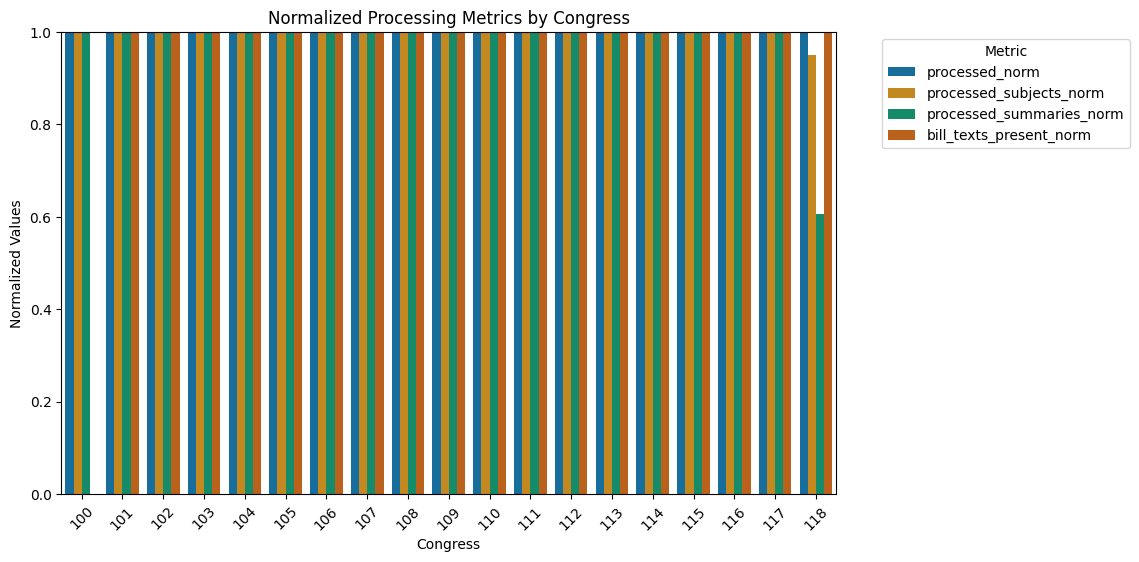

In [7]:
df = norm_bill_counts
plot_columns = ["processed_norm", "processed_subjects_norm", "processed_summaries_norm", "bill_texts_present_norm"]
# Melt the DataFrame to long format for Seaborn
df_melted = df.melt(id_vars=["congress"], 
                     value_vars=[col for col in df.columns if col in plot_columns], 
                     var_name="Metric", 
                     value_name="Value")

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="congress", y="Value", hue="Metric", palette="colorblind")

# Improve plot aesthetics
plt.xlabel("Congress")
plt.ylabel("Normalized Values")
plt.ylim(0, 1) 

plt.title("Normalized Processing Metrics by Congress")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

In [8]:
def count_bar_plot(dataframe: pd.DataFrame, attribute: str, n: int = None):
    """
    Returns a bar plot for the counts for the given attribute in a DataFrame
    """
    # Plot bar plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x="congress", y=attribute, data=dataframe)
    plt.xlabel("Congress")
    plt.ylabel(attribute)
    plt.ylim(0, 1) 
    plt.title(f"{attribute}")  # Counts of Categorical Values
    plt.show()

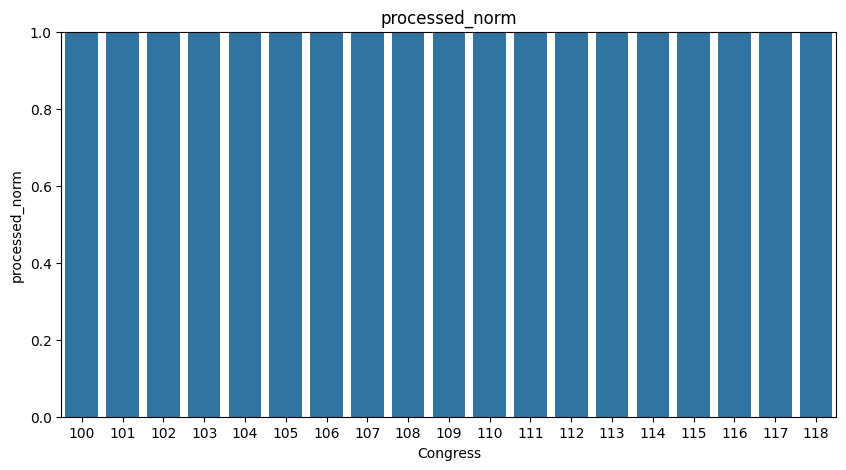

In [9]:
count_bar_plot(df, "processed_norm")

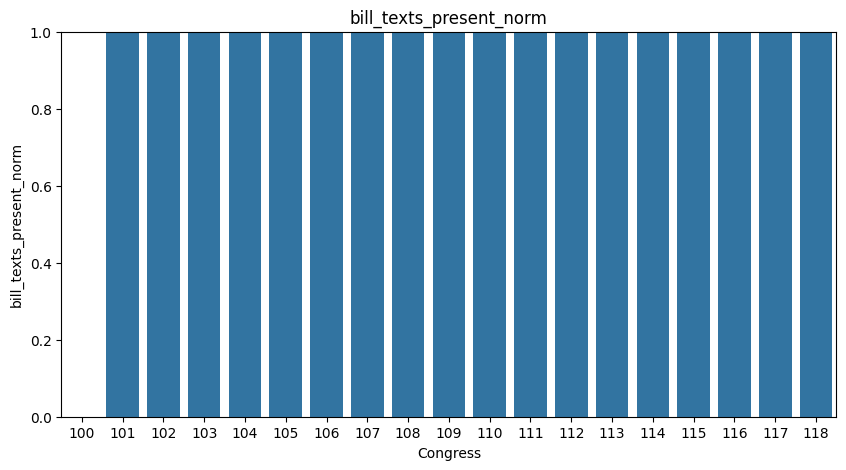

In [10]:
count_bar_plot(df, "bill_texts_present_norm")

In [11]:
frames = []
for path in detailed_bill_status_csv:
    df = pd.read_csv(path)
    frames.append(df)
detailed_bills_df = pd.concat(frames)

detailed_bills_df["text_formats"] = detailed_bills_df["text_formats"].apply(ast.literal_eval)

In [12]:
exploded = detailed_bills_df.explode("text_formats")
exploded[['type', 'format', 'date']] = pd.DataFrame(exploded['text_formats'].to_list(), index=exploded.index)



In [13]:
exploded

,congress,house,bill_number,bill,text_formats,subjects,summaries,textVersions,type,format,date
0,102,s,3389,True,"(Considered and Passed Senate, Formatted Text,...",True,True,True,Considered and Passed Senate,Formatted Text,None
0,102,s,3389,True,"(Engrossed in Senate, Formatted Text, None)",True,True,True,Engrossed in Senate,Formatted Text,None
0,102,s,3389,True,"(Referred in House, Formatted Text, None)",True,True,True,Referred in House,Formatted Text,None
1,102,s,3371,True,"(Considered and Passed Senate, Formatted Text,...",True,True,True,Considered and Passed Senate,Formatted Text,None
1,102,s,3371,True,"(Engrossed in Senate, Formatted Text, None)",True,True,True,Engrossed in Senate,Formatted Text,None
...,...,...,...,...,...,...,...,...,...,...,...
17826,117,s,2764,True,"(Introduced in Senate, PDF, 2021-09-20T04:00:00Z)",True,True,True,Introduced in Senate,PDF,2021-09-20T04:00:00Z
17826,117,s,2764,True,"(Introduced in Senate, Formatted XML, 2021-09-...",True,True,True,Introduced in Senate,Formatted XML,2021-09-20T04:00:00Z
17827,117,s,2762,True,"(Introduced in Senate, Formatted Text, 2021-09...",True,True,True,Introduced in Senate,Formatted Text,2021-09-20T04:00:00Z
17827,117,s,2762,True,"(Introduced in Senate, PDF, 2021-09-20T04:00:00Z)",True,True,True,Introduced in Senate,PDF,2021-09-20T04:00:00Z


In [42]:
df = exploded
df = df.loc[(df['date'].notnull()) & (df["format"] == "Formatted Text")]
df.sort_values("date")

,congress,house,bill_number,bill,text_formats,subjects,summaries,textVersions,type,format,date
552,104,s,1643,True,"(Introduced in Senate, Formatted Text, 1966-03...",True,True,True,Introduced in Senate,Formatted Text,1966-03-26T05:00:00Z
4372,105,s,1466,True,"(Introduced in Senate, Formatted Text, 1977-11...",True,True,True,Introduced in Senate,Formatted Text,1977-11-08T05:00:00Z
665,105,hr,4533,True,"(Introduced in House, Formatted Text, 1988-09-...",True,True,True,Introduced in House,Formatted Text,1988-09-09T04:00:00Z
3054,105,hr,2589,True,"(Referred in Senate, Formatted Text, 1989-03-2...",True,True,True,Referred in Senate,Formatted Text,1989-03-26T05:00:00Z
8225,103,hr,1324,True,"(Introduced in House, Formatted Text, 1991-03-...",True,True,True,Introduced in House,Formatted Text,1991-03-11T05:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...
19,118,hr,8841,True,"(Public Law, Formatted Text, 2025-01-05T04:59:...",True,True,True,Public Law,Formatted Text,2025-01-05T04:59:59Z
33,118,hr,7385,True,"(Public Law, Formatted Text, 2025-01-05T04:59:...",True,True,True,Public Law,Formatted Text,2025-01-05T04:59:59Z
26,118,hr,7938,True,"(Public Law, Formatted Text, 2025-01-05T04:59:...",True,False,True,Public Law,Formatted Text,2025-01-05T04:59:59Z
49,118,hr,1318,True,"(Public Law, Formatted Text, 2025-01-05T04:59:...",True,True,True,Public Law,Formatted Text,2025-01-05T04:59:59Z


In [28]:
text_format_counts = df.groupby(["congress", "type"]).agg(
    bill_count=("bill_number", "count"),
).reset_index()
text_format_counts

,congress,type,bill_count
0,103,Agreed to House,104
1,103,Agreed to Senate,191
2,103,Committee Discharged House,7
3,103,Committee Discharged Senate,150
4,103,Considered and Passed House,38
...,...,...,...
411,118,Referred in House,2
412,118,Referred in Senate,502
413,118,Referred to Committee House,1
414,118,Reported in House,890
